### link para baixar dados 
### https://brasil.io/dataset/covid19/caso/?search=&date=&state=MG&city=&place_type=&is_last=&city_ibge_code=&order_for_place=


# Analise caso de Covid19 - Minas Gerais

In [1]:
import pandas as pd

In [10]:
covid = pd.read_csv("dataset/covid19-083a6de0151147d1975210d003da0adc.csv")
covid.head()

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-05-03,MG,Abaeté,city,1,0,True,23237.0,3100203.0,4.30348,0.0
1,2020-05-03,MG,Além Paraíba,city,7,0,True,35362.0,3101508.0,19.79526,0.0
2,2020-05-03,MG,Alfenas,city,6,0,True,79996.0,3101607.0,7.50038,0.0
3,2020-05-03,MG,Almenara,city,6,0,True,41896.0,3101706.0,14.32118,0.0
4,2020-05-03,MG,Alpercata,city,1,0,True,7424.0,3101805.0,13.46983,0.0


### Ajustando Colunas


In [11]:
covid_ref = covid[['date', 'city', 'confirmed', 'deaths', 'estimated_population_2019', 'confirmed_per_100k_inhabitants']]
covid_ref.columns = ['data', 'cidade', 'casos', 'mortes', 'populacao', 'habitantes_por_100k' ]
covid = covid_ref.dropna()
covid.head()

,data,cidade,casos,mortes,populacao,habitantes_por_100k
0,2020-05-03,Abaeté,1,0,23237.0,4.30348
1,2020-05-03,Além Paraíba,7,0,35362.0,19.79526
2,2020-05-03,Alfenas,6,0,79996.0,7.50038
3,2020-05-03,Almenara,6,0,41896.0,14.32118
4,2020-05-03,Alpercata,1,0,7424.0,13.46983


### Buscando Dados da Cidade de Sabara


In [22]:
covid_sabara = covid.query("cidade=='Sabará'")
covid_casos_sabara = covid_sabara[["data", "casos", "mortes"]]
covid_casos_sabara.head()

,data,casos,mortes
152,2020-05-03,14,0
341,2020-05-02,14,0
527,2020-05-01,14,0
709,2020-04-30,13,0
887,2020-04-29,12,0


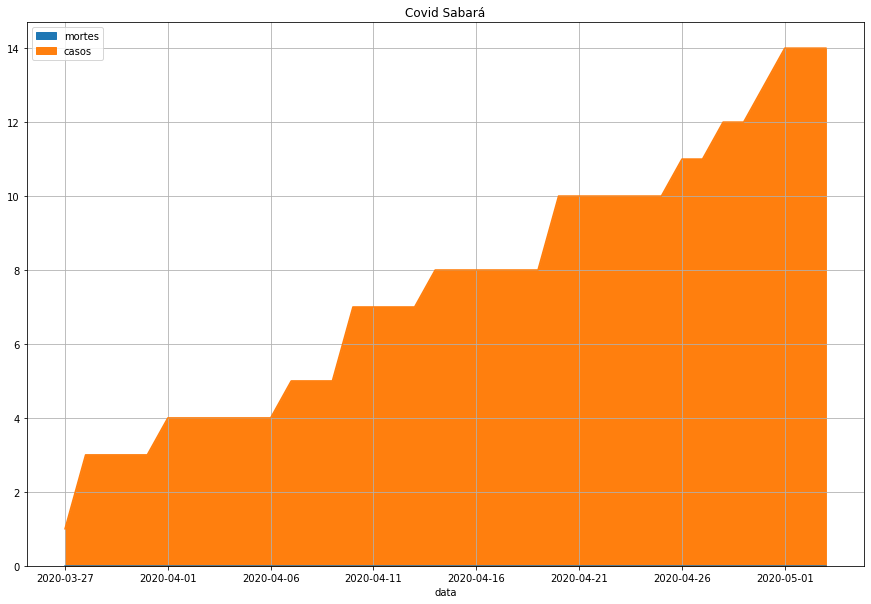

In [23]:
covid_casos_sabara = covid_casos_sabara.sort_values(by="data")
covid_casos_sabara.plot.area(x="data", y=["mortes", "casos"], figsize=(15,10), title="Covid Sabará", grid=True)